# Classifying movie reviews into positive or negative reviews

IMDB: Internet Movie Database: https://www.imdb.com/

Dataset (smaller version): https://www.kaggle.com/utathya/imdb-review-dataset/version/1

This workshop covers:
- Loading the text dataset
- Text Processing Techniques
- Text Vectorisation
- Visualising Text Vectors
- Training a Classifier using Text Vectors

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## Load data

In [2]:
df = pd.read_csv('imdb_master.csv',
                 encoding='latin_1', index_col=0)

df1 = df.loc[df.label != 'unsup']

df1.label.value_counts() # count each label value

pos    25000
neg    25000
Name: label, dtype: int64

In [3]:
df_train = df1.loc[df1.type == 'train']
df_test = df1.loc[df1.type == 'test']

In [4]:
df_train = df_train.sample(n=2000, random_state=42)
df_test = df_test.sample(n=2000, random_state=42)

In [5]:
df_train.head()

,type,review,label,file
31868,train,"Silent Night, Deadly Night 5 is the very last ...",neg,4932_4.txt
49016,train,The idea ia a very short film with a lot of in...,pos,9115_10.txt
34668,train,"For me, this movie just seemed to fall on its ...",neg,7452_4.txt
38640,train,Was this based on a comic-book? A video-game? ...,pos,11026_7.txt
39018,train,Caution: May contain spoilers...<br /><br />I'...,pos,11367_10.txt


In [6]:
df_train.iloc[0]['review'] # 1 document

'Silent Night, Deadly Night 5 is the very last of the series, and like part 4, it\'s unrelated to the first three except by title and the fact that it\'s a Christmas-themed horror flick.<br /><br />Except to the oblivious, there\'s some obvious things going on here...Mickey Rooney plays a toymaker named Joe Petto and his creepy son\'s name is Pino. Ring a bell, anyone? Now, a little boy named Derek heard a knock at the door one evening, and opened it to find a present on the doorstep for him. Even though it said "don\'t open till Christmas", he begins to open it anyway but is stopped by his dad, who scolds him and sends him to bed, and opens the gift himself. Inside is a little red ball that sprouts Santa arms and a head, and proceeds to kill dad. Oops, maybe he should have left well-enough alone. Of course Derek is then traumatized by the incident since he watched it from the stairs, but he doesn\'t grow up to be some killer Santa, he just stops talking.<br /><br />There\'s a mysterio

# Process Text

## Text processing:
- Tokenise: split text into words
- Lemmatise: look at word form, considering noun, adjective, etc
- Stem: get the word stem (bluntly chop off the end)

### Goals:
- Identify unique words
- Avoid duplicating the same word form (e.g. cat, cats) in order to keep number of features small

### Curse of Dimensionality:
- 1 word is at least 1 feature (not considering N-grams - sequences of N words)
- Reducing number of words will improve scalability

## Install Natural Language Toolkit (NLTK)

From Anaconda environment:
```
conda install nltk
```

In [7]:
# Requires: conda install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\issohl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\issohl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\issohl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Tokenise

In [8]:
from nltk import word_tokenize

text = 'Hello this is a test.'

word_tokenize(text)

['Hello', 'this', 'is', 'a', 'test', '.']

## Lemmatise

In [9]:
text = 'he liked cats and dogs, and teaching machines to learn'

# just tokenisation
word_tokenize(text)

['he',
 'liked',
 'cats',
 'and',
 'dogs',
 ',',
 'and',
 'teaching',
 'machines',
 'to',
 'learn']

In [10]:
# WordNet is a lexical database, it is used to
# find the lemma of a word based on language rules (verb, etc)
from nltk.stem import WordNetLemmatizer

text = 'he liked cats and dogs, and teaching machines to learn fasting mice men women'

# tokenisation + lemmatisation
wnl = WordNetLemmatizer()

tokens = word_tokenize(text) # tokenise into terms

# Lemmatise each token and return a list
# - Either: List comprehension,
# - Or: For loop

# Option 1: list comprehension way:
[wnl.lemmatize(token) for token in tokens]

# Option 2: For loop:
result = []
for token in tokens:
    result.append(wnl.lemmatize(token))
result

['he',
 'liked',
 'cat',
 'and',
 'dog',
 ',',
 'and',
 'teaching',
 'machine',
 'to',
 'learn',
 'fasting',
 'mouse',
 'men',
 'woman']

## Stem

In [11]:
# Stemmer looks at word endings and chops it off
# based on some rules, e.g: es -> e
from nltk.stem import SnowballStemmer

text = 'he liked cats and dogs, and teaching machines to learn fasting mice men women'
stem = SnowballStemmer(language='english')

# tokenise, then stem
tokens = word_tokenize(text)
[stem.stem(token) for token in tokens]

['he',
 'like',
 'cat',
 'and',
 'dog',
 ',',
 'and',
 'teach',
 'machin',
 'to',
 'learn',
 'fast',
 'mice',
 'men',
 'women']

## Stop words

In [12]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

text = 'he liked cats and dogs, and teaching machines to learn'

# lower case
lower = text.lower()

# tokenize
tokens = word_tokenize(lower)

# remove stop words
# for each token, add to list if it is not in the stopword list
[token for token in tokens if (not token in stop)]

['liked', 'cats', 'dogs', ',', 'teaching', 'machines', 'learn']

In [13]:
# add / remove words to stoplist
# This changes the local copy, not the original stoplist

stop.add('la')
stop.remove('because') # changes the stop list in-place
                       # so running this cell again will return
                       # KeyError

In [14]:
print(stop)

{'should', 'those', 'itself', 'has', 'now', 'off', "you'll", 'doesn', 'about', "hasn't", 'a', 'who', 's', "mustn't", 'themselves', 'm', 'its', 'above', 'which', 'yourself', 'below', 'why', "needn't", 'don', 'yourselves', 'do', 'few', "should've", 'theirs', 'isn', 'after', 'them', 'where', "you'd", 'were', "wouldn't", 'then', 'of', "you're", 'just', "mightn't", 'mustn', 'she', 'if', 'can', 'or', "wasn't", 'won', 'this', 'each', 'from', 'under', 'his', 're', "hadn't", 'than', 'further', 'how', 'aren', 'but', 'have', 'couldn', "doesn't", "isn't", 'here', 'by', 'any', 'are', 'i', 'y', 'didn', 'yours', 'does', 'over', 'all', 'will', 'in', 'her', 'whom', 'at', 'am', 'down', 'some', 'me', 'not', 'between', 'weren', 'and', 't', "shan't", 'when', 'we', 'same', 'you', 'was', 'ma', 'doing', 'o', 'my', 'our', 'an', 'again', 'himself', 'nor', 'into', 'hadn', 'la', 'he', "couldn't", 'there', "won't", 'having', 'only', 'it', "don't", 'shouldn', 'as', 'so', 'hasn', 'shan', 'they', 'had', 'that', 'll',

# Vectorise Text

Vectorisation converts words into vectors of numbers

Common ways:
- By word count: CountVectorizer
- By word and document frequency: TfidfVectorizer
- By word vectors (gensim Word2Vec)

## Word Count Vectorisation

* Words that are used more frequently get a higher count

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
   'This is the first document.',
   'This document is the second document.',
   'And this is the third one.',
   'Is this the first document?',
]

cv = CountVectorizer()

# returns a sparse matrix
# sparse matrix: efficient format for matrices with a lot of 0s
# why 0s? same words are not always used in every document
result = cv.fit_transform(corpus)
print(result) 

#   (0, 1)	1
# means (row, column) non-zero value
# usually sorted by rows, but not always by column

  (0, 1)	1
  (0, 2)	1
  (0, 6)	1
  (0, 3)	1
  (0, 8)	1
  (1, 5)	1
  (1, 1)	2
  (1, 6)	1
  (1, 3)	1
  (1, 8)	1
  (2, 4)	1
  (2, 7)	1
  (2, 0)	1
  (2, 6)	1
  (2, 3)	1
  (2, 8)	1
  (3, 1)	1
  (3, 2)	1
  (3, 6)	1
  (3, 3)	1
  (3, 8)	1


In [16]:
# convert sparse matrix to dense matrix
result.todense()

matrix([[0, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 2, 0, 1, 0, 1, 1, 0, 1],
        [1, 0, 0, 1, 1, 0, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [17]:
# vocabulary
col_name = cv.get_feature_names()

# create dataframe with count vectors as data
# and vocabulary as headers
temp = pd.DataFrame(result.todense(), columns=col_name)

# add the original text as the 'text column 
temp['text'] = corpus

temp

,and,document,first,is,one,second,the,third,this,text
0,0,1,1,1,0,0,1,0,1,This is the first document.
1,0,2,0,1,0,1,1,0,1,This document is the second document.
2,1,0,0,1,1,0,1,1,1,And this is the third one.
3,0,1,1,1,0,0,1,0,1,Is this the first document?


## Word and Document Frequency (TF-IDF) Vectorisation

- TF: Term Frequency: rewards words commonly used in a document
- IDF: Inverse Document Frequency: penalises words commonly used in all documents

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
   'This is the first document.',
   'This document is the second document.',
   'And this is the third one.',
   'Is this the first document?',
]

tfidf = TfidfVectorizer()
result = tfidf.fit_transform(corpus)
result.todense()

matrix([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524],
        [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
         0.53864762, 0.28108867, 0.        , 0.28108867],
        [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
         0.        , 0.26710379, 0.51184851, 0.26710379],
        [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524]])

In [19]:
tfidf.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [20]:
# inverse of how many documents contains this term
tfidf.idf_

array([1.91629073, 1.22314355, 1.51082562, 1.        , 1.91629073,
       1.91629073, 1.        , 1.91629073, 1.        ])

In [21]:
# inspecting the Inverse-Document Frequency for each
# term
temp = pd.DataFrame(tfidf.get_feature_names())
temp['idf'] = tfidf.idf_
temp

,0,idf
0,and,1.916291
1,document,1.223144
2,first,1.510826
3,is,1.000000
4,one,1.916291
5,second,1.916291
6,the,1.000000
7,third,1.916291
8,this,1.000000


In [22]:
# vocabulary
col_name = tfidf.get_feature_names()

# create dataframe with count vectors as data
# and vocabulary as headers
temp = pd.DataFrame(result.todense(), columns=col_name)

# add the original text as the 'text column 
temp['text'] = corpus

temp

,and,document,first,is,one,second,the,third,this,text
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085,This is the first document.
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089,This document is the second document.
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104,And this is the third one.
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085,Is this the first document?


## Word2Vec

Word2Vec generates word-vectors where vectors close together in vector space have similar meanings based on context, and word-vectors distant to each other have differing meanings.

https://radimrehurek.com/gensim/models/word2vec.html

https://radimrehurek.com/gensim/models/keyedvectors.html

### Install gensim

Gensim is a library to train word vectors and to consume pre-trained word vectors.

From Anaconda environment:
```
conda install gensim
```

In [23]:
from gensim.models import Word2Vec

corpus = [
    'Dashing through the snow',
    'In a one-horse open sleigh',
    'Over the fields we go',
    'Laughing all the way',
    'Bells on bob-tail ring',
    'Making spirits bright',
    'What fun it is to ride and sing a sleighing song tonight'
]

# split text into words
corpus_tokens = [word_tokenize(doc.lower()) for doc in corpus]

vector_size=10 # vector representation (typically about 50-100 for larger vocabs)
window_size=3 # how many words to see around it (depending on task)

# train
word2vec = Word2Vec(corpus_tokens, size=vector_size, window=window_size,
                    min_count=1, workers=4)

# model.save("word2vec.model") # save for use later

word2vec.wv['snow'] # numpy vector of a word

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


array([-0.0241556 ,  0.0304557 , -0.00313591, -0.004926  , -0.0417055 ,
        0.03378602,  0.02714459,  0.04138164,  0.01962712,  0.04242539],
      dtype=float32)

In [24]:
word2vec.wv['sleigh'] # numpy vector of a word

array([-2.9858397e-03, -4.4529639e-05,  1.9895381e-03,  8.2571758e-03,
        3.4722486e-03,  9.7618783e-03, -6.5765460e-03, -2.8016534e-02,
        4.2780340e-02, -2.3609916e-02], dtype=float32)

In [25]:
# find similar words
word2vec.most_similar('snow')

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('go', 0.8308119773864746),
 ('ride', 0.7542840242385864),
 ('spirits', 0.7060720920562744),
 ('one-horse', 0.4769761860370636),
 ('bells', 0.4632706642150879),
 ('and', 0.3797527253627777),
 ('sing', 0.364645779132843),
 ('tonight', 0.32928308844566345),
 ('open', 0.16916939616203308),
 ('in', 0.16779181361198425)]

In [26]:
# inspect vocabulary
word2vec.wv.vocab

{'dashing': <gensim.models.keyedvectors.Vocab at 0x21cda005c50>,
 'through': <gensim.models.keyedvectors.Vocab at 0x21cda005cc0>,
 'the': <gensim.models.keyedvectors.Vocab at 0x21cda005c88>,
 'snow': <gensim.models.keyedvectors.Vocab at 0x21cda005cf8>,
 'in': <gensim.models.keyedvectors.Vocab at 0x21cda005d30>,
 'a': <gensim.models.keyedvectors.Vocab at 0x21cda005d68>,
 'one-horse': <gensim.models.keyedvectors.Vocab at 0x21cda005da0>,
 'open': <gensim.models.keyedvectors.Vocab at 0x21cda005dd8>,
 'sleigh': <gensim.models.keyedvectors.Vocab at 0x21cda005e10>,
 'over': <gensim.models.keyedvectors.Vocab at 0x21cda005e48>,
 'fields': <gensim.models.keyedvectors.Vocab at 0x21cda005e80>,
 'we': <gensim.models.keyedvectors.Vocab at 0x21cda005eb8>,
 'go': <gensim.models.keyedvectors.Vocab at 0x21cda005ef0>,
 'laughing': <gensim.models.keyedvectors.Vocab at 0x21cda005f28>,
 'all': <gensim.models.keyedvectors.Vocab at 0x21cda005f60>,
 'way': <gensim.models.keyedvectors.Vocab at 0x21cda005f98>,
 

In [27]:
# get word vectors
word2vec.wv.vectors.shape

(34, 10)

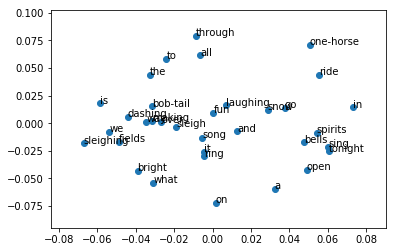

In [28]:
# plot the vectors in vector space
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

wv_2d = pca.fit_transform(word2vec.wv.vectors)

fig, ax = plt.subplots()
vocab = word2vec.wv.vocab

ax.scatter(wv_2d[:, 0], wv_2d[:, 1])

for i, word in enumerate(vocab):
    ax.annotate(word, (wv_2d[i, 0], wv_2d[i, 1]))

### Pre-trained Word2Vec models

Instead of training your own word2vec, you can alternatively load the (large!) pre-trained models

https://github.com/RaRe-Technologies/gensim-data

# Putting it together

### TF-IDF vectorisation

In [29]:
class StemmerTokenizer(object):
    def __init__(self):
        self.stemmer = SnowballStemmer(language='english')
        self.stop = set(stopwords.words('english'))

    def __call__(self, doc):

        # tokenize text into tokens
        tokens = word_tokenize(doc)

        # strip out punctuation
        words = [t for t in tokens if t.isalpha()]
        
        # strip out stopwords
        words = [t for t in words if t not in self.stop]
        
        # lemmatize each token
        return [self.stemmer.stem(t) for t in words]

tfidf = TfidfVectorizer(analyzer='word', tokenizer=StemmerTokenizer())

Z_train_tfidf = tfidf.fit_transform(df_train.review)
Z_test_tdidf = tfidf.transform(df_test.review)

print(Z_train_tfidf.shape)
print(Z_test_tdidf.shape)

(2000, 16413)
(2000, 16413)


### Word2Vec

Word2Vec vectors are more geared towards deep learning. We will revisit this after we've covered Deep Learning.

To use this with sklearn, we will need to perform an averaging or summing operation on the Word2Vec vectors.

Example: https://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/

In [30]:
stem_tokenise = StemmerTokenizer()
train_tokens = [stem_tokenise(review) for review in df_train.review]
test_tokens = [stem_tokenise(review) for review in df_test.review]

# train word2vec
dimension = 50 # vector size of 5
window_size = 10 # 5 words around each token
word2vec = Word2Vec(train_tokens, size=dimension, window=window_size,
                    min_count=1, workers=4)

In [31]:
# inspect vocab
# inspect vectors
word2vec.wv.most_similar('horror')

[('fun', 0.9992152452468872),
 ('terribl', 0.9986472725868225),
 ('actual', 0.9986103177070618),
 ('entertain', 0.9984951019287109),
 ('absolut', 0.9983296990394592),
 ('make', 0.9983088970184326),
 ('best', 0.9981921315193176),
 ('surpris', 0.9981886148452759),
 ('lot', 0.9978866577148438),
 ('opinion', 0.9978313446044922)]

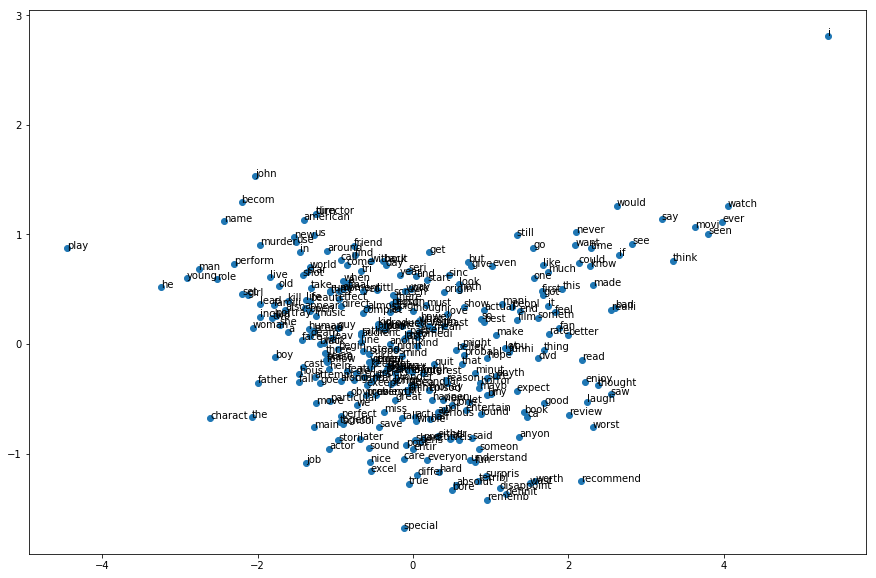

In [32]:
# plot first N vectors
num_to_plot = 300
pca = PCA(n_components=2)

wv_2d = pca.fit_transform(word2vec.wv.vectors[:num_to_plot])

fig, ax = plt.subplots(figsize=(15, 10))
vocab = word2vec.wv.index2word[:num_to_plot]

ax.scatter(wv_2d[:, 0], wv_2d[:, 1])

for i, word in enumerate(vocab):
    ax.annotate(word, (wv_2d[i, 0], wv_2d[i, 1]))

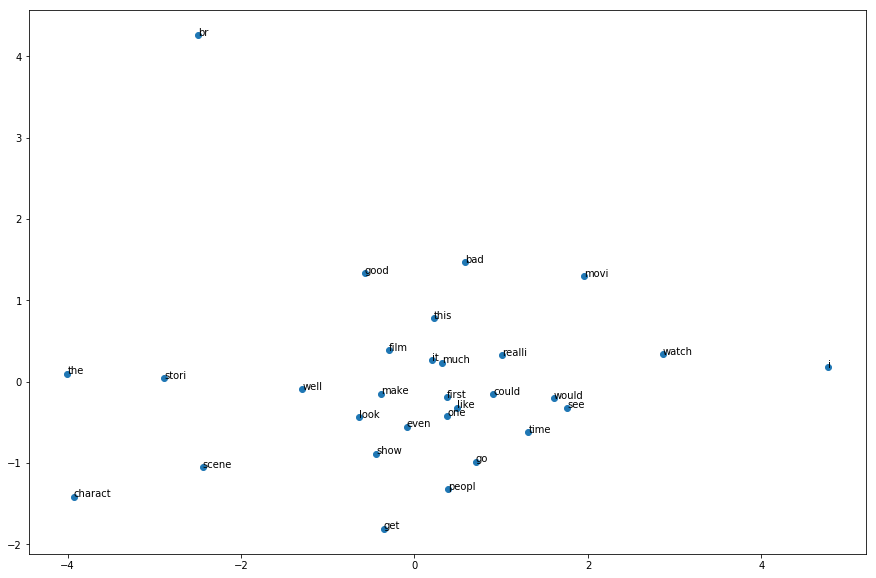

In [33]:
# 300 too hard to see, zoom in to first 30
num_to_plot = 30
pca = PCA(n_components=2)

wv_2d = pca.fit_transform(word2vec.wv.vectors[:num_to_plot])

fig, ax = plt.subplots(figsize=(15, 10))
vocab = word2vec.wv.index2word[:num_to_plot]

ax.scatter(wv_2d[:, 0], wv_2d[:, 1])

for i, word in enumerate(vocab):
    ax.annotate(word, (wv_2d[i, 0], wv_2d[i, 1]))

#### Applying Word Vectors in sklearn (Advanced)

This technique is used sometimes in order to apply Word2Vec vectors using scikit-learn models.

Most cases, Word2Vec embeddings are used with Deep Learning models, such as with the Embedding Layer in Keras.

As a result of a limitation of scikit-learn, we need to convert the Word2Vec vector into a single number (by taking the mean), which loses some representation.

In [34]:
class EmbeddingVectorizer(object):
    def __init__(self, word2vec, dimension):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = dimension

    def transform(self, X):
        return np.array([
            # take the mean of the word vectors for that word
            # or zero if the word is out of vocabulary
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [35]:
w2v = dict(zip(word2vec.wv.index2word, word2vec.wv.vectors))
mev = EmbeddingVectorizer(w2v, dimension)

# EmbeddingVectorizer takes in tokens, so we used
# the StemmerTokenizer above to tokenise df_train and df_test
# accordingly
Z_train_word2vec = mev.transform(train_tokens)
Z_test_word2vec = mev.transform(test_tokens)

print(Z_train_word2vec.shape)
print(Z_test_word2vec.shape)

(2000, 50)
(2000, 50)


# Visualisation in 2D

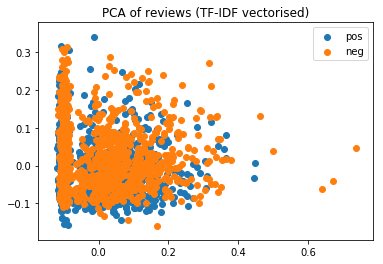

In [36]:
# visualize only the first n rows
n = 3000

# Vectors are about the same magnitude, so no need to scale
pca = PCA(n_components=2)
Z_train_2d = pca.fit_transform(Z_train_tfidf[:n].todense())
y_train = df_train.label[:n]

fig, ax = plt.subplots()

labels = ['pos', 'neg']

for l in labels:
    ax.scatter(Z_train_2d[y_train == l, 0],
               Z_train_2d[y_train == l, 1],
               label=l)

ax.set(title='PCA of reviews (TF-IDF vectorised)')

ax.legend()

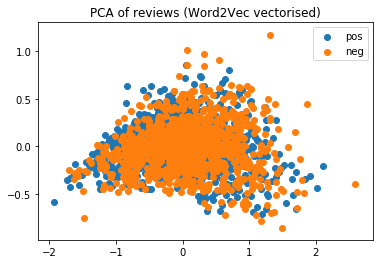

In [37]:
# visualize only the first n rows
n = 3000

# Vectors are about the same magnitude, so no need to scale
pca = PCA(n_components=2)
Z_train_2d = pca.fit_transform(Z_train_word2vec[:n])
y_train = df_train.label[:n]

fig, ax = plt.subplots()

labels = ['pos', 'neg']

for l in labels:
    ax.scatter(Z_train_2d[y_train == l, 0],
               Z_train_2d[y_train == l, 1],
               label=l)

ax.set(title='PCA of reviews (Word2Vec vectorised)')
    
ax.legend()

# Training Classifiers

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
model = SGDClassifier(max_iter=1000, tol=1e-3)

scores_tfidf = cross_validate(model, Z_train_tfidf, y_train, cv=10,
                              return_train_score=False,
                              return_estimator=True)
scores_tfidf

{'fit_time': array([0.02205968, 0.02406216, 0.03559947, 0.0250721 , 0.02218723,
        0.01562405, 0.01562762, 0.0196414 , 0.01611328, 0.01562595]),
 'score_time': array([0.00100565, 0.0020051 , 0.00150394, 0.0020051 , 0.        ,
        0.        , 0.        , 0.00150251, 0.        , 0.        ]),
 'estimator': (SGDClassifier(alpha=0.0001, average=False, class_weight=None,
         early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
         l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
         n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
         power_t=0.5, random_state=None, shuffle=True, tol=0.001,
         validation_fraction=0.1, verbose=0, warm_start=False),
  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
         early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
         l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
         n_iter=None, n_iter_no_change=5, n_jobs=None,

              precision    recall  f1-score   support

         neg       0.81      0.81      0.81      1040
         pos       0.80      0.79      0.80       960

   micro avg       0.81      0.81      0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.81      0.80      2000



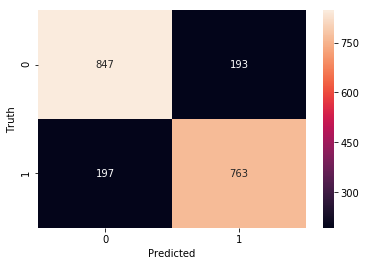

In [40]:
best_tfidf = scores_tfidf['estimator'][scores_tfidf['test_score'].argmax()]

y_test = df_test.label
pred_tfidf = best_tfidf.predict(Z_test_tdidf)
print(classification_report(y_test, pred_tfidf))

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred_tfidf), ax=ax, annot=True, fmt='d')
ax.set(xlabel='Predicted', ylabel='Truth')
plt.show()

In [41]:
# Try Word2Vec
scores_w2v = cross_validate(model, Z_train_word2vec, y_train, cv=10,
                            return_train_score=False,
                            return_estimator=True)
scores_w2v

{'fit_time': array([0.03108215, 0.02406502, 0.04412699, 0.02907777, 0.03008151,
        0.03804064, 0.01562738, 0.03125334, 0.03877902, 0.01562905]),
 'score_time': array([0.00100279, 0.00300717, 0.00200558, 0.00100327, 0.00100327,
        0.00100255, 0.        , 0.        , 0.00100446, 0.        ]),
 'estimator': (SGDClassifier(alpha=0.0001, average=False, class_weight=None,
         early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
         l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
         n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
         power_t=0.5, random_state=None, shuffle=True, tol=0.001,
         validation_fraction=0.1, verbose=0, warm_start=False),
  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
         early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
         l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
         n_iter=None, n_iter_no_change=5, n_jobs=None,

              precision    recall  f1-score   support

         neg       0.61      0.70      0.66      1040
         pos       0.62      0.52      0.56       960

   micro avg       0.62      0.62      0.62      2000
   macro avg       0.62      0.61      0.61      2000
weighted avg       0.62      0.62      0.61      2000



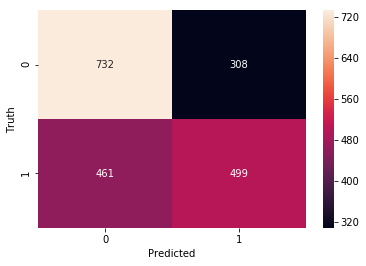

In [42]:
best_w2v = scores_w2v['estimator'][scores_w2v['test_score'].argmax()]

y_test = df_test.label
pred_w2v = best_w2v.predict(Z_train_word2vec)
print(classification_report(y_test, pred_w2v))

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred_w2v), ax=ax, annot=True, fmt='d')
ax.set(xlabel='Predicted', ylabel='Truth')
plt.show()

Word2Vec not as good as TF-IDF

Possible reason: we are taking the mean Word2Vec values and losing some information.

Word2Vec *should* be better with deep learning (of course actual experience may vary)

In [43]:
# Example predictions

# Some test data
sample_reviews = df_test[-10:]
sample_reviews

,type,review,label,file
14377,test,First I have to admit that I have had some dou...,pos,11690_10.txt
5384,test,I don't understand the humor in this film. I a...,neg,3597_1.txt
5502,test,The films of the Science Fiction Channel ( Sci...,neg,3702_4.txt
20210,test,"As a kid I loved the song ""Never smile at a cr...",pos,5690_8.txt
20243,test,I don't need to say much about how good this d...,pos,571_10.txt
15415,test,Got this the other day from the Creators on DV...,pos,1374_9.txt
1569,test,Another Son of Sam is definitely not an Oscar ...,neg,11412_2.txt
2232,test,Whenever someone tries to tell me that they th...,neg,12009_1.txt
18176,test,"In Strangers On A Train, it's obvious from the...",pos,385_9.txt
3752,test,Yikes.<br /><br />I've seen quite a few bad mo...,neg,2127_1.txt


In [44]:
from sklearn.metrics import accuracy_score
Z_sample_reviews = tfidf.transform(sample_reviews.review)

pred = best_tfidf.predict(Z_sample_reviews)
print('truth', sample_reviews.label.values)
print('pred', pred)
print('accuracy', accuracy_score(sample_reviews.label, pred))

truth ['pos' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'neg' 'pos' 'neg']
pred ['pos' 'neg' 'neg' 'neg' 'pos' 'pos' 'neg' 'neg' 'pos' 'neg']
accuracy 0.9
